- I den här delen, Jag har Flyttad delar av min kod från del 1 till funktioner och moduler och skapat en klass ( HealthAnalyzer i src filen) som utförat:
 - räkna ut medel, median, min och max för: age, weight, height, systolic_bp, cholesterol,  
 - histogram över blodtryck,
 - boxplot över vikt per kön och 
 - beräkna andelen personer i datasetet som har sjukdomen.

- använd scikit-learn för en linjär regression för att förutsäga blodtryck från ålder och vikt.
- Lägg till en ny analys och graf som ger en djupare förståelse om relationen mellan blodtryck och ålder, blodtryck och vikt. 
- Baserat på analysen och de visuella resultaten kan vi se att blodtrycket verkar påverkas mer av ålder än av vikt.

               age      weight      height  systolic_bp  cholesterol
count   800.000000  800.000000  800.000000   800.000000   800.000000
mean     49.426250   73.413000  171.849250   149.178625     4.929150
std      14.501118   13.685059    9.804259    12.793360     0.848413
median   50.000000   73.200000  171.350000   149.400000     4.970000
max      90.000000  114.400000  200.400000   185.900000     7.880000
min      18.000000   33.700000  144.400000   106.800000     2.500000


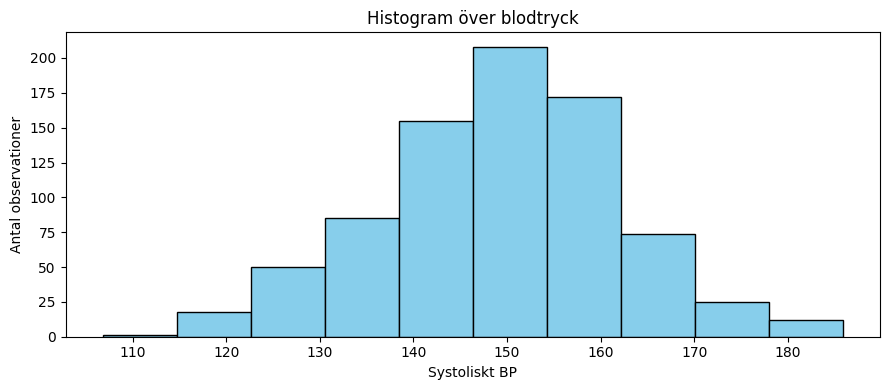

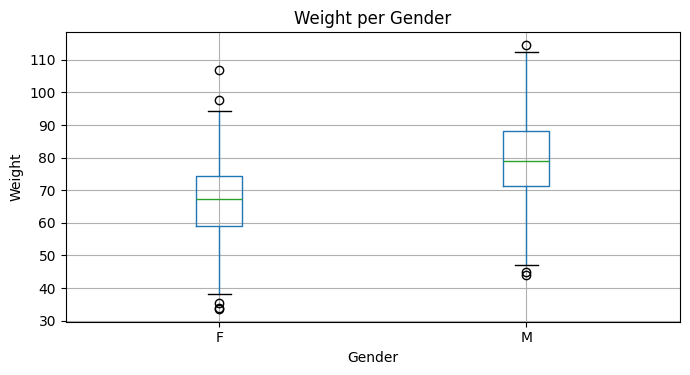

5.9% verkliga andelen personer har sjukdom.
4.3% simulerade andelen personer har sjukdom.


(np.float64(5.875), np.float64(4.3))

In [1]:
import numpy as np
import pandas as pd
import sys
import os 
sys.path.append("c:/Users/Banin/Desktop/project_del2/project_Del_1/src")
from health_analyzer import HealthAnalyzer



# Skapa analysobjekt
analyzer = HealthAnalyzer("data/health_study_dataset.csv")
# Visa statistik
stats = analyzer.get_summary_stats()
print(stats)
# Rita histogram
analyzer.plot_bp_histogram()
#  Rita Boxplot
analyzer.plot_box_graph()
# simulera sjukdom
analyzer.simulate_disease_probability()

- Intercept: blodtryck när ålder=0 och vikt=0 (teoretiskt)

- Coefficients: hur mycket blodtrycket förändras per enhet ålder eller vikt

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv( "data/health_study_dataset.csv")

X = np.array(df[["age", "weight"]])   # independent variable
y = np.array(df[["systolic_bp"]])     # dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)
sd_y = np.std(y, ddof=1)

# Print slope and intercept
print("Slope:", model.coef_)
print("Intercept:", model.intercept_)
print("sd of y:", sd_y)


Slope: [[0.53892763 0.17765752]]
Intercept: [109.49908145]
sd of y: 12.793360316766597


- systolic_bp $= 109.499+0.539 $ age $+0.178 $ weight $$

- Slope coefficients : 0.539 -> For every 1-year increase in age, blood pressure increases by ~0.539 mmHg, assuming weight is constant.

   0.178 -> For every 1 kg increase in weight, blood pressure increases by ~0.178 mmHg, assuming age is constant.

- Standard deviation of y:

   sd_y = 12.79 -> This tells us how much the systolic BP varies in our dataset.

   Higher standard deviation -> more variation in blood pressure among people.





      ----Regression :  förutsäga blodtryck från ålder  ------
    skarning (intercept)                    :  122.685
     lutning (slope)                        :  0.536
     R^2                                    :  0.369






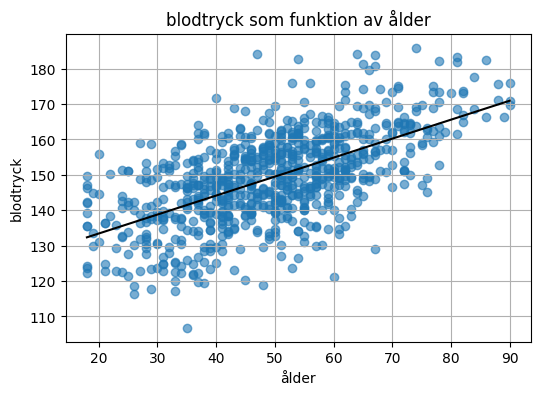

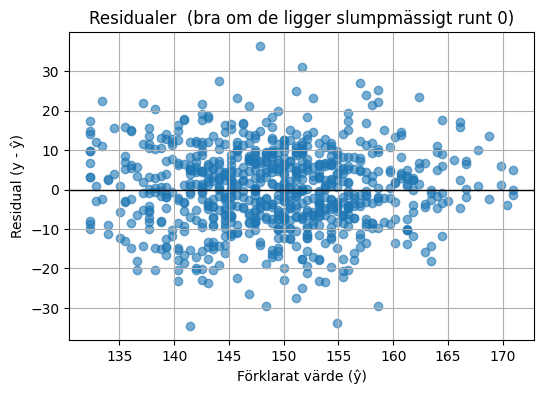

In [3]:
# förutsäga blodtryck från ålder  

import matplotlib.pyplot as plt


X = df[["age"]].to_numpy()
y = df["systolic_bp"].to_numpy()

model = LinearRegression()
model.fit(X, y)

intercept_hat = float(model.intercept_)
slope_hat = float(model.coef_[0])

y_hat = model.predict(X)
residuals = y - y_hat

#R^2

ss_tot = np.sum((y - y.mean())** 2)
ss_res = np.sum((residuals)**2)
r2 = 1 - ss_res / ss_tot

print(f"""
      ----Regression :  förutsäga blodtryck från ålder  ------
    skarning (intercept)                    : {intercept_hat: .3f}
     lutning (slope)                        : {slope_hat: .3f}
     R^2                                    : {r2 : .3f}



""") 
plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, )

X_line = np.linspace(X.min(), X.max(), 100)
y_line = intercept_hat + slope_hat * X_line
plt.plot(X_line, y_line, color="black", label="Regressionslinje")

plt.title("blodtryck som funktion av ålder")
plt.xlabel("ålder")
plt.ylabel("blodtryck")
plt.grid(True)
plt.show()





plt.figure(figsize=(6, 4))
plt.scatter(y_hat, residuals, alpha=0.6)
plt.axhline(0, color="black", linewidth=1)

plt.title("Residualer  (bra om de ligger slumpmässigt runt 0)")
plt.xlabel("Förklarat värde (ŷ)")
plt.ylabel("Residual (y - ŷ)")
plt.grid(True)
plt.show()


      ----Regression = förutsäga blodtryck från vikt ------
    skarning (intercept)                    :  136.862
     lutning (slope)                        :  0.168
     R^2                                    :  0.032






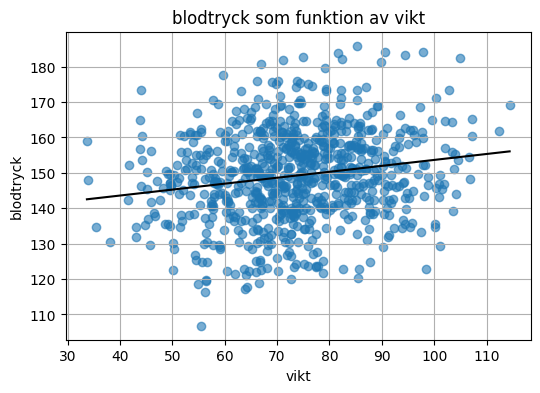

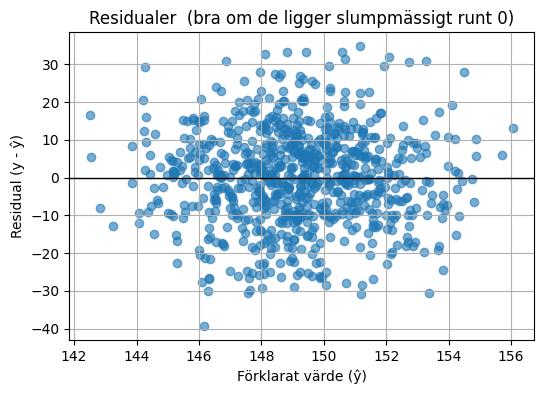

In [4]:

# förutsäga blodtryck från vikt

X = df[["weight"]].to_numpy()
y = df["systolic_bp"].to_numpy()

model = LinearRegression()
model.fit(X, y)

intercept_hat = float(model.intercept_)
slope_hat = float(model.coef_[0])

y_hat = model.predict(X)
residuals = y - y_hat

#R^2

ss_tot = np.sum((y - y.mean())** 2)
ss_res = np.sum((residuals)**2)
r2 = 1 - ss_res / ss_tot

print(f"""
      ----Regression = förutsäga blodtryck från vikt ------
    skarning (intercept)                    : {intercept_hat: .3f}
     lutning (slope)                        : {slope_hat: .3f}
     R^2                                    : {r2 : .3f}



""") 
plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, )

X_line = np.linspace(X.min(), X.max(), 100)
y_line = intercept_hat + slope_hat * X_line
plt.plot(X_line, y_line, color="black", label="Regressionslinje")

plt.title("blodtryck som funktion av vikt")
plt.xlabel("vikt")
plt.ylabel("blodtryck")
plt.grid(True)
plt.show()





plt.figure(figsize=(6, 4))
plt.scatter(y_hat, residuals, alpha=0.6)
plt.axhline(0, color="black", linewidth=1)

plt.title("Residualer  (bra om de ligger slumpmässigt runt 0)")
plt.xlabel("Förklarat värde (ŷ)")
plt.ylabel("Residual (y - ŷ)")
plt.grid(True)
plt.show()

- Ålder påverkar blodtryck ganska tydligt i detta dataset.

- Vikt påverkar nästan inte alls i detta dataset.

- Därför får jag en högre R² för ålder och nästan ingen för vikt.